In [14]:
import numpy as np
from sklearn.datasets import load_digits#手写数字在这里
from sklearn.preprocessing import LabelBinarizer#标签化
from sklearn.model_selection import train_test_split#对训练集 测试集进行区分
from sklearn.metrics import classification_report,confusion_matrix#对准确率 召回率 混淆矩阵
import matplotlib.pyplot as plt

(1797, 8, 8)


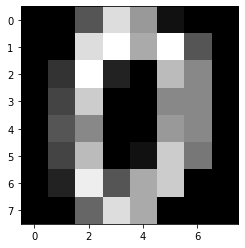

In [3]:
#载入数据
digits = load_digits()
print(digits.images.shape)
#显示图片
plt.imshow(digits.images[0],cmap='gray')
plt.show()

In [4]:
#读入数据
X = digits.data
#标签
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [5]:
#神经网络的定义
#64-100-10 因为每个样本有64个元素，隐藏层一般比输入层大些 
#输入到隐藏层
V = np.random.random([64,100])*2-1
#隐藏层到输出层
W = np.random.random([100,10])*2-1

#数据切分
X_train,X_test,y_train,y_test = train_test_split(X,y)#训练集 3/4 测试集 1/4

#标签二值化
#0---1000000000
#3---0001000000#第几个位置

labels_train = LabelBinarizer().fit_transform(y_train)
print(y_train[:5])
print(labels_train[:5])

[7 6 6 0 9]
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [10]:
#定义激活函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsigmoid(x):
    return x*(1-x)


def train(X,y,steps=10000,lr=0.11):#steps训练次数
    global V,W
    for n in range(steps+1):
        #随机选取数据
        i = np.random.randint(X.shape[0])
        #根据随机数 获取一个数据
        x = X[i]#X[i]代表了一张图，所以x会有64个数值
        x = np.atleast_2d(x)#将数据转换为二维，有两个括号，方便做矩阵乘法
        #BP算法公式：
        #计算隐藏层输出
        #L1 = sigmoid(np.dot(X,V))#这个就是转换为二维的原因
        L1 = sigmoid(np.dot(x,V))
        #输出层的输出
        L2 = sigmoid(np.dot(L1,W))
        
        #输出层学习信号
        L2_delta = (y[i]-L2)*dsigmoid(L2)
        L1_delta = L2_delta.dot(W.T)*dsigmoid(L1)
        
        #更新权值
        W += lr * L1.T.dot(L2_delta)
        V += lr * x.T.dot(L1_delta)
        
        if n%1000 == 0:#预测准确率
            output = predict(X_test)
            predictions = np.argmax(output,axis=1)#获取output最大值的位置，因为标签数字化了
            acc = np.mean(np.equal(predictions,y_test))
            print('steps:',n,'acc:',acc)
            
def predict(x):
    #计算隐藏层输出
    L1 = sigmoid(np.dot(x,V))
    #输出层的输出
    L2 = sigmoid(np.dot(L1,W))
    return L2

In [11]:
train(X_train,labels_train,20000)

steps: 0 acc: 0.05333333333333334
steps: 1000 acc: 0.5955555555555555
steps: 2000 acc: 0.7266666666666667
steps: 3000 acc: 0.8777777777777778
steps: 4000 acc: 0.9022222222222223
steps: 5000 acc: 0.9355555555555556
steps: 6000 acc: 0.9088888888888889
steps: 7000 acc: 0.9333333333333333
steps: 8000 acc: 0.94
steps: 9000 acc: 0.9244444444444444
steps: 10000 acc: 0.9355555555555556
steps: 11000 acc: 0.9444444444444444
steps: 12000 acc: 0.9511111111111111
steps: 13000 acc: 0.9555555555555556
steps: 14000 acc: 0.9466666666666667
steps: 15000 acc: 0.9511111111111111
steps: 16000 acc: 0.9711111111111111
steps: 17000 acc: 0.9466666666666667
steps: 18000 acc: 0.9555555555555556
steps: 19000 acc: 0.9644444444444444
steps: 20000 acc: 0.9711111111111111


In [12]:
ss = digits.data
sss = ss[0]
print(sss.shape)

(64,)


In [15]:
output = predict(X_test)
predictions = np.argmax(output,axis = 1)

print(classification_report(predictions,y_test))#查看准确率和召回率

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      0.98      0.99        49
           2       0.98      0.95      0.97        44
           3       0.92      0.96      0.94        46
           4       1.00      0.98      0.99        43
           5       0.98      0.96      0.97        50
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        39
           8       0.85      0.92      0.89        38
           9       0.98      0.96      0.97        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [16]:
print(confusion_matrix(predictions,y_test))#混淆矩阵，对角线上为预测准确的

[[52  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  1  0]
 [ 0  0 42  0  0  0  0  0  2  0]
 [ 0  0  0 44  0  1  0  0  0  1]
 [ 0  0  1  0 42  0  0  0  0  0]
 [ 0  0  0  1  0 48  0  0  1  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  3  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  2 45]]
